In [ ]:
%matplotlib inline


Gaussian HMM of stock data
--------------------------

This script shows how to use Gaussian HMM on stock price data from
Yahoo! finance. For more information on how to visualize stock prices
with matplotlib, please refer to ``date_demo1.py`` of matplotlib.



In [1]:
from __future__ import print_function

import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM


print(__doc__)

Automatically created module for IPython interactive environment


Get quotes from Yahoo! finance



In [2]:
quotes = quotes_historical_yahoo_ochl(
    "INTC", datetime.date(1995, 1, 1), datetime.date(2012, 1, 6))

# Unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])


In [8]:
dates[mask]

NameError: name 'mask' is not defined

In [7]:
import pandas as pd
a = pd.DataFrame(X)
len(a)


4285

Run Gaussian HMM



In [13]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")
len(hidden_states)
np.unique(hidden_states)

fitting to HMM and decoding ...done


array([0, 1, 2, 3])

Transition matrix
[[  9.79218016e-01   1.80609525e-02   3.80987465e-15   2.72103125e-03]
 [  1.18908991e-01   4.60953988e-01   4.20137021e-01   1.46208789e-18]
 [  1.46702400e-12   4.13596683e-02   7.73511410e-01   1.85128922e-01]
 [  3.25258776e-03   6.90246423e-04   1.12656182e-01   8.83400984e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  2.35046537e-02   4.97390851e+07]
var =  [  7.07689573e-01   2.49468861e+14]

1th hidden state
mean =  [ -3.56297547e-01   1.53095659e+08]
var =  [  2.59490324e+00   5.88822466e+15]

2th hidden state
mean =  [  2.14124581e-02   8.82076539e+07]
var =  [  1.20416998e-01   5.64850046e+14]

3th hidden state
mean =  [  7.74787071e-03   5.43193259e+07]
var =  [  5.09579155e-02   1.54637453e+14]



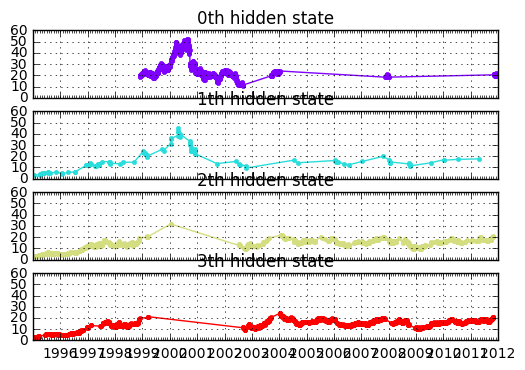

In [14]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()